In [44]:
# Loading programs
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

In [45]:
# Define a helper function to remove duplicates while preserving order
def _sort(seq):
    seen = set()
    seen_add = seen.add
    return [x for x in seq if not (x in seen or seen_add(x))]

In [46]:
# Set parameters for plot appearance
params = {'legend.fontsize': 14,
          'figure.figsize': (20,8),
          'axes.labelsize': 16,
          'axes.titlesize': 16,
          'xtick.labelsize': 14,
          'ytick.labelsize': 14,
          #'title.set_fontsize': 18,
          #'xaxis.label.set_size': 12,
          #'yaxis.label.set_size': 12
          #'axes.titlepad': 25
         }
plt.rcParams.update(params)

In [120]:
# Read the data from a CSV file
df = pd.read_csv("Freq_H3N2_2023.csv", sep="\t", index_col=False)

In [122]:
# Select relevant columns from the DataFrame
df = df[['Virus', 'collection_date', 'lineage']]
# Add a new column indicating the country (in this case, Brazil)
df["country"] = ["Brazil"]*len(df)

In [123]:
# Reset the index of the DataFrame
df.reset_index(drop=True, inplace=True)

In [124]:
# Convert the 'collection_date' column to datetime format
df['collection_date'] = pd.to_datetime(df['collection_date'])

In [125]:
# Specify the country of interest (in this case, only Brazil)
COUNTRY = ["Brazil"]

['#fbb4ae', '#b3cde3', '#ccebc5']
8


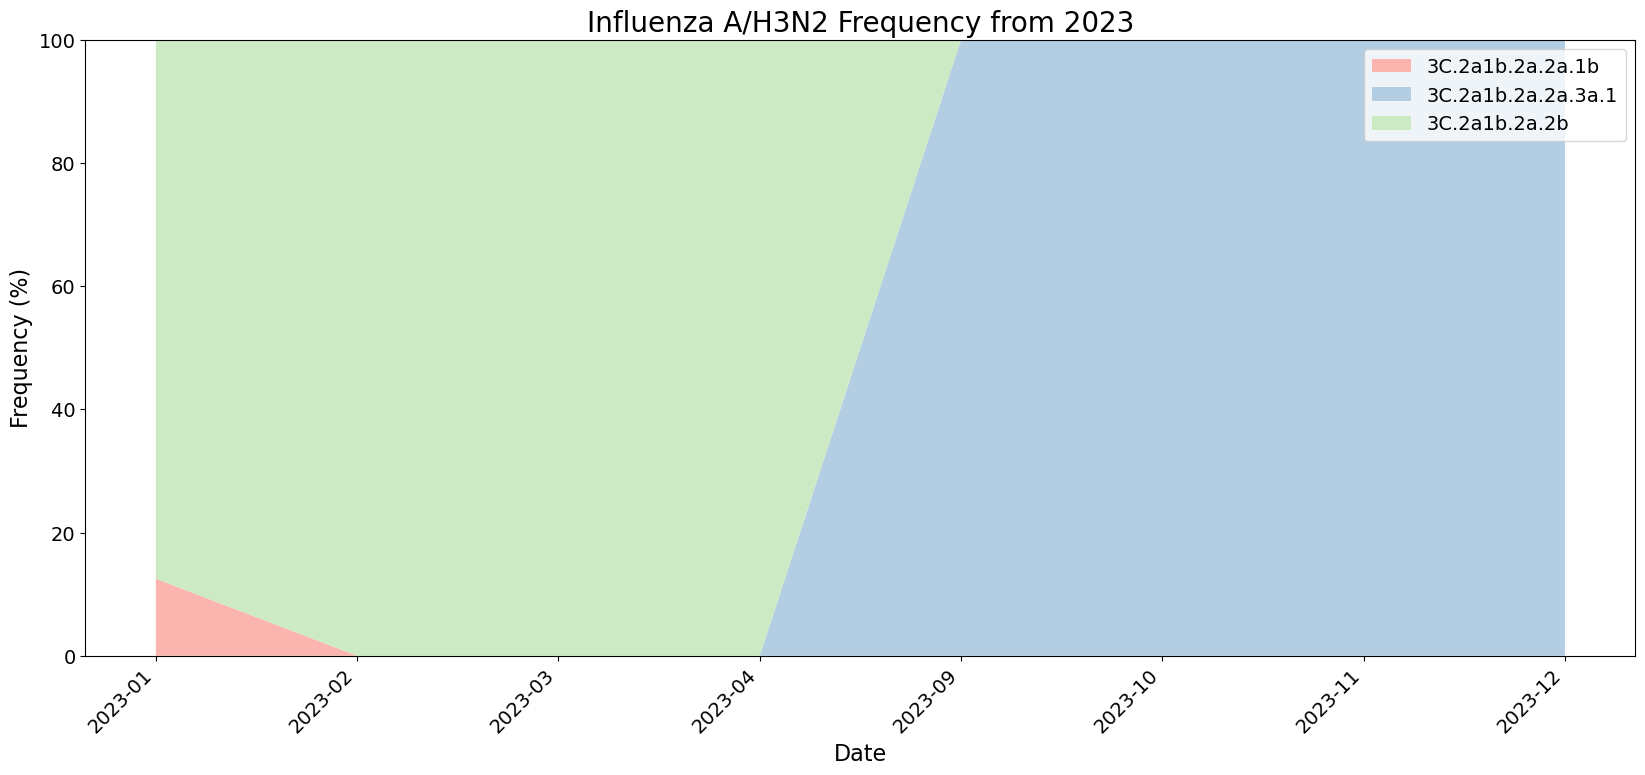

In [126]:
# Extract unique clades present in the DataFrame
unique_clades = set(df['lineage'])
#unique_clades = set(df['Virus'])

# Create a dictionary mapping each clade to a unique color using the Paired colormap
clade_color_dict = {clade: plt.cm.get_cmap('Paired').colors[i] for i, clade in enumerate(unique_clades)}

# Uncomment the following lines if you want to manually specify colors for each clade
#clade_color_dict = {"6B.1A.5a.1": "#8dd3c7", "6B.1A.5a.2a": "#e78ac3", "6B.1A.5a.2": "#bebada","6B.1A.5a.2a.1": "#80b1d3"}
"""clade_color_dict = {"3C.2a1b.2a.1": "#E31A1C", "3C.2a1b.2a.1a.1": "#E6AB02", "3C.2a1b.2a.2": "#bebada",
                    "3C.2a1b.2a.2c": "#e78ac3", "3C.2a1b.2a.2b": "#ccebc5", "3C.2a1b.2a.2a": "#33A02C",
                    "3C.2a1b.2a.2a.2": "#6A3D9A",
                    "3C.2a1b.2a.2a.1": "#8dd3c7", "3C.2a1b.2a.2a.1a": "#FB9A99", "3C.2a1b.2a.2a.1b": "#fbb4ae",
                    "3C.2a1b.2a.2a.3": "#80b1d3", "3C.2a1b.2a.2a.3b": "#B15928", "3C.2a1b.2a.2a.3a": "#1F78B4",
                    "3C.2a1b.2a.2a.3a.1": "#b3cde3"}"""


# Initialize a variable to keep track of the maximum frequency value
max_freq_value = 0

# Set up the plot
num_plots = len(COUNTRY)
num_rows = (num_plots + 1) // 2

# Set the title of the plot
plt.title('Influenza A/H3N2 Frequency from 2023', fontsize=20)

# Initialize lists and dictionaries for storing labels and handles
all_labels = []
handles=[]
labels=[]
handle_dict={}

# Filter the DataFrame based on the specified country
df2 = df.loc[np.where(df['country'] == COUNTRY[0])]
df2 = df2[['collection_date', 'lineage']]
df2['month'] = df2['collection_date'].dt.to_period('M')

# Group the data by month and lineage, calculate the frequency, and reshape the DataFrame
freq_por_mes = df2.groupby(['month', 'lineage']).size().unstack(fill_value=0)
freq_por_mes = freq_por_mes.T/freq_por_mes.sum(axis=1)*100
freq_por_mes = freq_por_mes.T

# Update the maximum frequency value
max_freq_value = max(max_freq_value, freq_por_mes.values.max())

# Extract the days for the x-axis
days = [str(month) for month in freq_por_mes.index]

# Assign colors to each clade for plotting
clade_colors=[clade_color_dict[c] for c in freq_por_mes.columns]


# Plot the data as a stacked area plot
lines = plt.stackplot(days, freq_por_mes.T.values, labels=freq_por_mes.columns, colors =clade_colors)
plt.xlabel('Date')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Frequency (%)')
plt.legend()
plt.ylim(0, 100)

# Save the plot as a PDF file
plt.savefig("H3N2_virus_Brazil_2023.pdf", dpi=300, bbox_inches='tight')
plt.show()
